<a href="https://colab.research.google.com/github/alirezakhodabakhsh/NiLearn_Connectivity/blob/main/niLearn_Connectome_Schizo_Moscow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install nilearn

In [7]:
!pip install nilearn
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os
import sklearn.preprocessing

In [8]:
coords=[(-68.423	,  49.871	, -7.4895 ) ,
(-48.2	   ,    57.551	,   39.87 )   ,	       
(48.143	,  57.584	 , 39.892  ) ,
(68.384	,  49.927	, -7.4851 ),
(-84.539	   ,    0	, -8.8451 	)  ,	 
(-63.171	    ,   0	 , 56.872  ),
(0	      ,      0	   ,   85  )  ,   
(63.167	   ,    0	,  56.876 ) , 
(84.539	   ,    0	, -8.8451 ),
(-49.709	, -68.691,	 -5.9589  ),
(-48.2	  ,    -57.551,	   39.87 ),
(0	    ,  -60.738,	  59.463 ),
(48.143	, -57.584,	  39.892 ),
(49.669	, -68.721,	  -5.953 	) , 	 	       
(-26.133,	 -80.784,	 -4.0011 ),	 	       
(26.133	, -80.784, -4.0011 )]

coords

[(-68.423, 49.871, -7.4895),
 (-48.2, 57.551, 39.87),
 (48.143, 57.584, 39.892),
 (68.384, 49.927, -7.4851),
 (-84.539, 0, -8.8451),
 (-63.171, 0, 56.872),
 (0, 0, 85),
 (63.167, 0, 56.876),
 (84.539, 0, -8.8451),
 (-49.709, -68.691, -5.9589),
 (-48.2, -57.551, 39.87),
 (0, -60.738, 59.463),
 (48.143, -57.584, 39.892),
 (49.669, -68.721, -5.953),
 (-26.133, -80.784, -4.0011),
 (26.133, -80.784, -4.0011)]

In [9]:
labels=['1 - F7',
'2 - F3',
'3 - F4',
'4 - F8',
'5 - T3',
'6 - C3',
'7 - Cz',
'8 - C4',
'9 - T4',
'10 - T5',
'11 - P3',
'12 - Pz',
'13 - P4',
'14 - T6',
'15 - O1',
'16 - O2']

In [10]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(data.func[0],
                                   confounds=data.confounds)

NameError: ignored

In [11]:
plt.plot(time_series[:,2])

NameError: ignored

In [12]:
def IMPORT(path, format):
  # PATH:
  # write "r", before your directory path
  # Example:
  # path = r'/content/drive/My Drive/MIC/HC_SZ_dataset/NORMAL'

  # FORMAT:
  # format must be string
  # Example:
  # "csv"

  def RESHAPE(x):
    # This function convert pandas data to numpy and also reshape data to desired shape!
    y1=pd.DataFrame(x).to_numpy(dtype=str)
    y2=np.reshape(y1, (16, 7680))
    y3=sklearn.preprocessing.normalize(y2)
    y4=np.expand_dims(np.expand_dims(y3,axis=0), axis=-1)
    return y4

  all_files = glob.glob(path + ("/*."+format))
  li=RESHAPE(pd.read_csv(all_files[0], header=None))
  L=len(all_files)
  for i in range(1,L):
      df = pd.read_csv(all_files[i], header=None)
      temp=RESHAPE(df)
      li=np.append(li, temp, axis=0)
  return li.astype('float32')

In [13]:
X_NRM=IMPORT( r'/content/drive/My Drive/EEG_DataSet/NORMAL', 'eea')
X_SCH=IMPORT( r'/content/drive/My Drive/EEG_DataSet/SCHIZO', 'eea')

In [14]:
X_SCH.shape

(45, 16, 7680, 1)

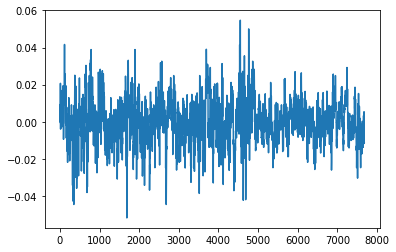

In [15]:
plt.plot(X_SCH[0,0,:,0])

In [16]:
#subject 1 / SHZ
time_series=np.transpose(X_SCH[1,:,:,0])

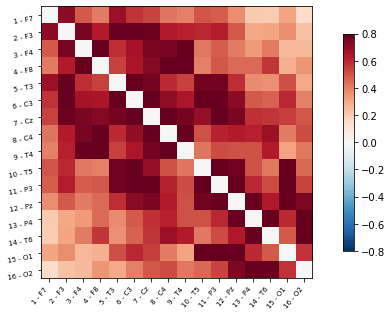

In [17]:
#subject 1 / SHZ
time_series=np.transpose(X_SCH[0,:,:,0])

from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

In [25]:
type(correlation_matrix)

numpy.ndarray

In [27]:
correlation_matrix.shape

(16, 16)

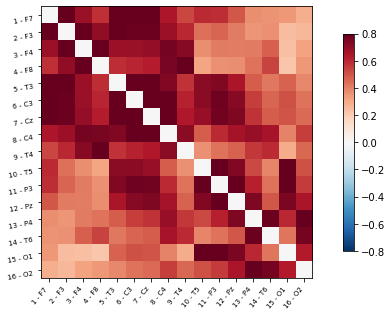

In [18]:
#subject 1 / SHZ
time_series=np.transpose(X_SCH[10,:,:,0])

from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

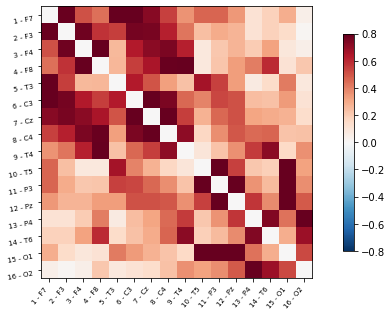

In [19]:
#subject 1 / SHZ
time_series=np.transpose(X_NRM[0,:,:,0])

from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

In [20]:
coords=[(-68.423	,  49.871	, -7.4895 ) ,
(-48.2	   ,    57.551	,   39.87 )   ,	       
(48.143	,  57.584	 , 39.892  ) ,
(68.384	,  49.927	, -7.4851 ),
(-84.539	   ,    0	, -8.8451 	)  ,	 
(-63.171	    ,   0	 , 56.872  ),
(0	      ,      0	   ,   85  )  ,   
(63.167	   ,    0	,  56.876 ) , 
(84.539	   ,    0	, -8.8451 ),
(-49.709	, -68.691,	 -5.9589  ),
(-48.2	  ,    -57.551,	   39.87 ),
(0	    ,  -60.738,	  59.463 ),
(48.143	, -57.584,	  39.892 ),
(49.669	, -68.721,	  -5.953 	) , 	 	       
(-26.133,	 -80.784,	 -4.0011 ),	 	       
(26.133	, -80.784, -4.0011 )]

In [21]:
len(coords)

16

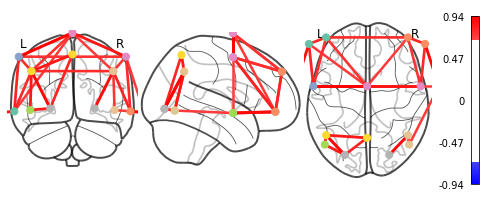

In [22]:
from nilearn import plotting

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

plotting.show()

In [ ]:
view = plotting.view_connectome(correlation_matrix, coords, edge_threshold='80%')

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

# dataset

In [14]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 5.7 MB/s 


In [2]:
cd '/content/drive/MyDrive/Thesis/MatLab matrix'

/content/drive/MyDrive/Thesis/MatLab matrix


In [15]:
!pip install nilearn
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os
import sklearn.preprocessing
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
import scipy.io

Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [64]:
#parameters
type_class='normal' # 'normal'/'schizo'
sub=2 # 1/2
band_sel='alpha' 

In [65]:
X = scipy.io.loadmat('subject_'+type_class+'_'+str(sub)+'.mat')
band={'delta':0 , 'theta':1 , 'alpha' : 2 , 'beta' : 3, 'gamma' : 4}
labels=['1 - F7','2 - F3','3 - F4','4 - F8','5 - T3','6 - C3','7 - Cz','8 - C4','9 - T4','10 - T5','11 - P3','12 - Pz','13 - P4','14 - T6','15 - O1','16 - O2']

Text(0.5, 1.0, 'Class: normal - Subject: 2th - Band: alpha')

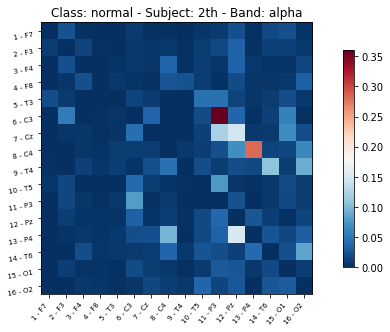

In [66]:
X= X['connectivity_matrix']
plotting.plot_matrix(X[:,:,band[band_sel]], labels=labels, colorbar=True)
plt.title('Class: {} - Subject: {}th - Band: {}'.format(type_class, sub, band_sel))

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:2205: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


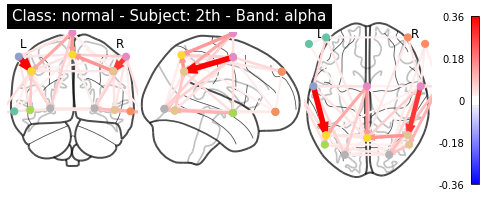

In [67]:
coords=[(-68.423	,  49.871	, -7.4895 ) ,
(-48.2	   ,    57.551	,   39.87 )   ,	       
(48.143	,  57.584	 , 39.892  ) ,
(68.384	,  49.927	, -7.4851 ),
(-84.539	   ,    0	, -8.8451 	)  ,	 
(-63.171	    ,   0	 , 56.872  ),
(0	      ,      0	   ,   85  )  ,   
(63.167	   ,    0	,  56.876 ) , 
(84.539	   ,    0	, -8.8451 ),
(-49.709	, -68.691,	 -5.9589  ),
(-48.2	  ,    -57.551,	   39.87 ),
(0	    ,  -60.738,	  59.463 ),
(48.143	, -57.584,	  39.892 ),
(49.669	, -68.721,	  -5.953 	) , 	 	       
(-26.133,	 -80.784,	 -4.0011 ),	 	       
(26.133	, -80.784, -4.0011 )]

plotting.plot_connectome(X[:,:,band[band_sel]], coords,
                         edge_threshold="80%", colorbar=True,
                         title='Class: {} - Subject: {}th - Band: {}'.format(type_class, sub, band_sel) )

plotting.show()

In [68]:
"""
view = plotting.view_connectome(X[:,:,band[band_sel]], coords, edge_threshold='80%')

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view
"""

"\nview = plotting.view_connectome(X[:,:,band[band_sel]], coords, edge_threshold='80%')\n\n# In a Jupyter notebook, if ``view`` is the output of a cell, it will\n# be displayed below the cell\nview\n"